[ 0  1  2  4  5  6  8  9 11 12 13 15 25 27 35 36]


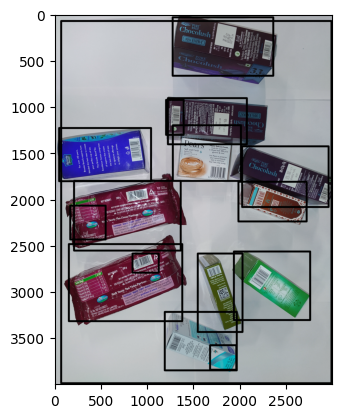

In [36]:
#Using Predefined Annotated Image Dataset
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
thres = 0.2
nms_threshold=0.4
img=cv2.imread('img6.jpg')
classNames= []
classFile = 'coco.names'
with open(classFile,'rt') as f:
 classNames = f.read().rstrip('\n').split('\n')
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'
net = cv2.dnn_DetectionModel(weightsPath,configPath)
net.setInputSize(320,320)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)
classIds, confs, bbox = net.detect(img,confThreshold=thres)
bbox=list(bbox)
confs=list(np.array(confs).reshape(1,-1)[0])
confs=list(map(float,confs))
#print(type(confs[0]))
#print(classIds,bbox)
indices=cv2.dnn.NMSBoxes(bbox,confs,thres,nms_threshold)
print(indices)
for i in indices:
    box=bbox[i]
    x,y,w,h=box[0],box[1],box[2],box[3]
    cv2.rectangle(img,(x,y),(x+w,y+h),color=(0,0,0),thickness=20)
#if len(classIds) != 0:
#  for classId,confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
#    cv2.rectangle(img,box,color=(0,0,0),thickness=20)
#    cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
#    cv2.putText(img,str(round(confidence*100,2)),(box[0]+200,box[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()

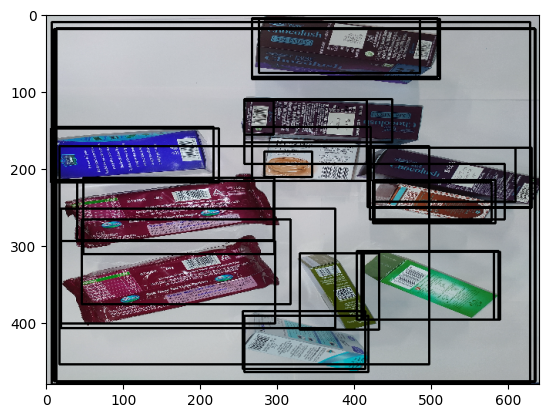

In [40]:
import cv2

image = cv2.imread('img6.jpg')
image = cv2.resize(image, (640, 480))
h = image.shape[0]
w = image.shape[1]

# path to the weights and model files
weights = "frozen_inference_graph.pb"
model = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
# load the MobileNet SSD model trained  on the COCO dataset
net = cv2.dnn.readNetFromTensorflow(weights, model)
# load the class labels the model was trained on
class_names = []
with open("coco.names", "r") as f:
    class_names = f.read().strip().split("\n")
# create a blob from the image
blob = cv2.dnn.blobFromImage(
    image, 1.0/127.5, (320, 320), [127.5, 127.5, 127.5])
# pass the blog through our network and get the output predictions
net.setInput(blob)
output = net.forward() # shape: (1, 1, 100, 7)
# loop over the number of detected objects
for detection in output[0, 0, :, :]: # output[0, 0, :, :] has a shape of: (100, 7)
    # the confidence of the model regarding the detected object
    probability = detection[2]

    # if the confidence of the model is lower than 50%,
    # we do nothing (continue looping)
    if probability < 0.2:
        continue

    # perform element-wise multiplication to get
    # the (x, y) coordinates of the bounding box
    box = [int(a * b) for a, b in zip(detection[3:7], [w, h, w, h])]
    box = tuple(box)
    # draw the bounding box of the object
    cv2.rectangle(image, box[:2], box[2:], (0, 0, 0), thickness=2)

    # extract the ID of the detected object to get its name
    class_id = int(detection[1])
    # draw the name of the predicted object along with the probability
    #label = f"{class_names[class_id - 1].upper()} {probability * 100:.2f}%"
    #cv2.putText(image, label, (box[0], box[1] + 15),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

plt.imshow(image)
plt.show()

In [ ]:
classIds, confs, bbox = net.detect(image,confThreshold=thres)
indices=cv2.dnn.NMSBoxes(bbox, confs, thres, nms_threshold)

[INFO] 5 unique contours found
262542.5
143234.5
165941.0
229261.5
109042.0


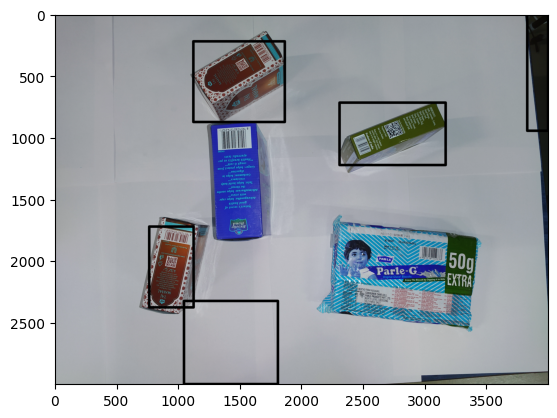

In [22]:
#Using Image processing Techniques
import numpy as np
import imutils
def bounding_box(image):
   cropped=[]
   # convert to grayscale
   img = cv2.imread(image)
   rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
   hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
   h, s, v = cv2.split(hsv_image)
   ret, th1 = cv2.threshold(h,180,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   kernel = np.ones((1,1), dtype = "uint8")/9
   bilateral = cv2.bilateralFilter(th1, 9 , 75, 75)
   erosion = cv2.erode(bilateral, kernel, iterations = 1)
   #finding the area of all connected white pixels in the image
   pixel_components, output, stats, centroids =cv2.connectedComponentsWithStats(erosion, connectivity=8)
   area = stats[1:, -1]; pixel_components = pixel_components - 1
   min_size = 99999
   img2 = np.zeros((output.shape))#Removing the small white pixel area below the minimum size
   for i in range(0, pixel_components):
     if area[i] >= min_size:
        img2[output == i + 1] = 255
   img3 = img2.astype(np.uint8)       
   # find contours in the thresholded image
   cnts = cv2.findContours(img3.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
   cnts = imutils.grab_contours(cnts)
   print("[INFO] {} unique contours found".format(len(cnts)))
   sum=0
   for j in cnts:
       rect = cv2.boundingRect(j)
       print(cv2.contourArea(j))
       x,y,w,h = rect
       cropped.append(img[x:x+w,y:y+h])
       cv2.rectangle(img, (x,y),(x+w,y+h),(0,0,0),20)
   plt.imshow(img)
   plt.show()
image="img4.jpg"
bounding_box(image)